In [87]:
import pandas as pd
import matplotlib.pyplot as plt


TRADER_NAMES = ['Remy', 'Vinnie', 'Vladimir', 'Rhianna', 'Ruby']


# Remy does not trade GIFT_BASKET
# Rhianna and Ruby do not trade CHOCOLATE
# Ruby does not trade ROSES
# Ruby and Rhianna do not trade STRAWBERRIES

#Rhianna seems to be an OP Roses signal


TRADER = 'Remy' #Set to one of the names above
PRODUCT = 'CHOCOLATE' #Set to GIFT_BASKET, CHOCOLATE, STRAWBERRIES, or ROSES

# Read in trade data with names and create one big df
df1 = pd.read_csv('../../data/round-5-island-data-bottle/trades_round_3_day_0_wn.csv', sep=';')
df2 = pd.read_csv('../../data/round-5-island-data-bottle/trades_round_3_day_1_wn.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../data/round-5-island-data-bottle/trades_round_3_day_2_wn.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
df = pd.concat([df1, df2, df3])
df = df.query('symbol==@PRODUCT')
# Read in prices data and create one big df
df1 = pd.read_csv('../../data/round-3-island-data-bottle/prices_round_3_day_0.csv', sep=';')
df2 = pd.read_csv('../../data/round-3-island-data-bottle/prices_round_3_day_1.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../data/round-3-island-data-bottle/prices_round_3_day_2.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
prices = pd.concat([df1, df2, df3])
prices = prices.query('product==@PRODUCT')
print(f'Buyers of {PRODUCT} and number of trades: {df.buyer.value_counts()}')
print(f'Sellers of {PRODUCT} and number of trades: {df.seller.value_counts()}')

Buyers of CHOCOLATE and number of trades: buyer
Vinnie      1768
Remy        1077
Vladimir       3
Name: count, dtype: int64
Sellers of CHOCOLATE and number of trades: seller
Remy        1188
Vinnie      1071
Vladimir     589
Name: count, dtype: int64


For each trader we want to show:

1.) position over time, assuming they start at position 0 and have to cloas at mid price at EOD
2.) plot of when they trade and how much they trade over time plotted against mid price

In [88]:
df_trader = df.query('buyer==@TRADER or seller==@TRADER').copy()
df_trader['quantity'] = df_trader.apply(lambda x: x['quantity'] if x['buyer'] == TRADER else -x['quantity'], axis=1)
df_trader_1 = df_trader.query('timestamp < 1000000').copy()
df_trader_1['position'] = df_trader_1['quantity'].cumsum()
df_trader_2 = df_trader.query('timestamp < 2000000 and timestamp >= 1000000').copy()
df_trader_2['position'] = df_trader_2['quantity'].cumsum()
df_trader_3 = df_trader.query('timestamp < 3000000 and timestamp >= 2000000').copy()
df_trader_3['position'] = df_trader_3['quantity'].cumsum()
df_trader = pd.concat([df_trader_1, df_trader_2, df_trader_3])
df_trader = df_trader.merge(prices[['timestamp', 'mid_price']], on='timestamp', how='right')
#fill na values of position with most recent value
df_trader['position'] = df_trader['position'].fillna(method='ffill')
df_trader['position'] = df_trader['position'].fillna(0)

/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_67530/778710723.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_trader['position'] = df_trader['position'].fillna(method='ffill')


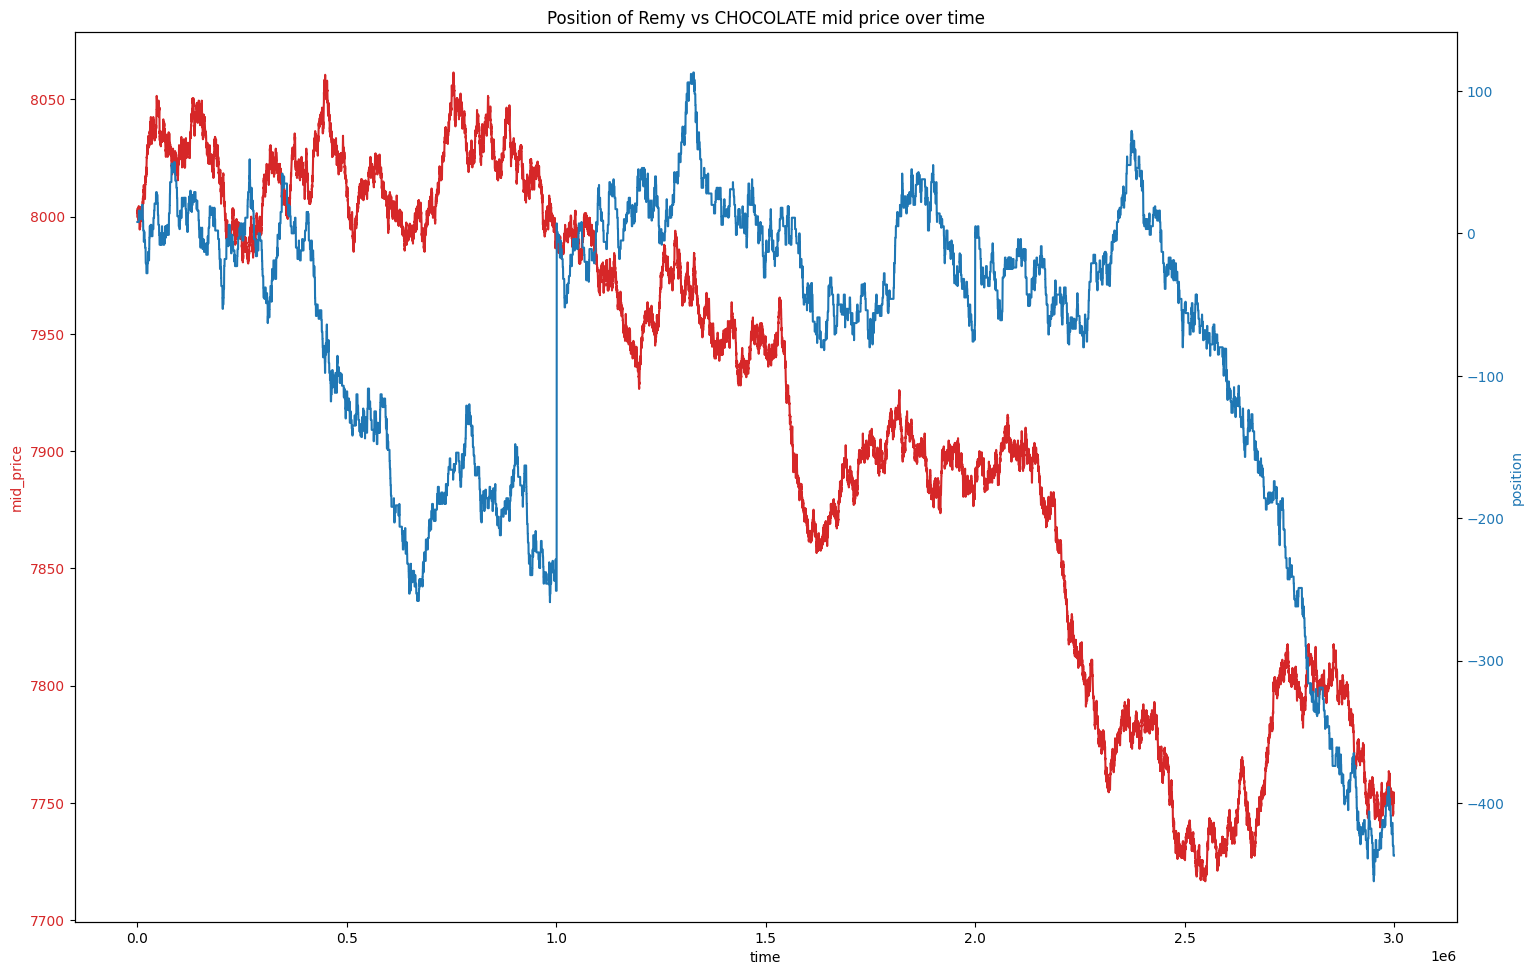

In [89]:
#plot position and price over time wtih right y axis for position
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(df_trader['timestamp'], df_trader['position'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Position of {TRADER} vs {PRODUCT} mid price over time')
plt.show()